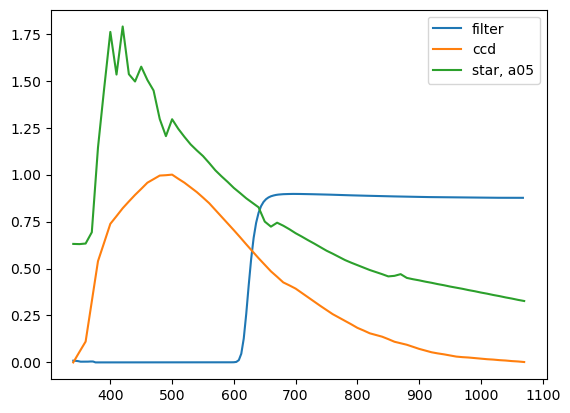

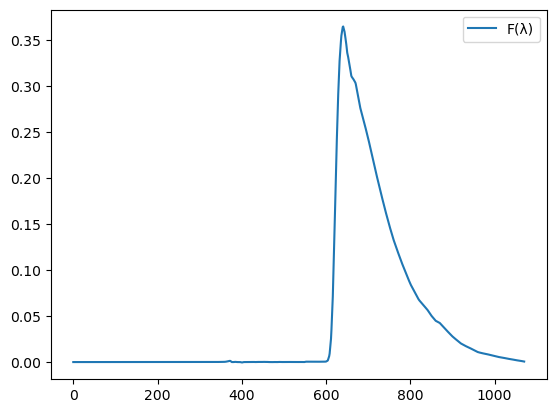

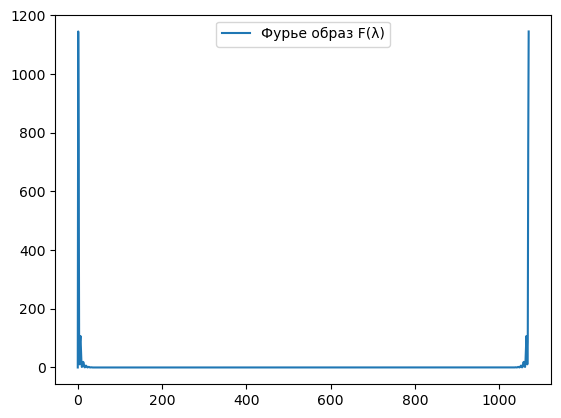

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/miron/Downloads/KC19_d16t4_Safonov.csv", sep = ';')
df['14.42.43'] = df['14.42.43'] / 100

ccd = pd.read_csv("C:/Users/miron/Downloads/ccd_prosilica2.crv", sep = ' ')
ccd['X'] = ccd['X'] * 1000

a05 = pd.read_csv("C:/Users/miron/Downloads/a05.sp", sep = ' ')

# на данном этапе мы обрезаем значения файлов так, чтобы они покрывались всеми тремя файлами
tmp_min = np.max([ccd['X'][0], a05['X'][0], df['WAVE_LENGTH'][0]])
tmp_max = np.min([ccd['X'].iat[-1], a05['X'].iat[-1], df['WAVE_LENGTH'].iat[-1]])

df = df[df['WAVE_LENGTH'] < tmp_max]
X1 = df['WAVE_LENGTH']
Y1 = df['14.42.43']

ccd = ccd[ccd['X'] > tmp_min]
X2 = ccd['X']
Y2 = ccd['Y']

a05 = a05[a05['X'] > tmp_min]
X3 = a05['X']
Y3 = a05['Y']

# т.к. разбивка по осям отличается, нужно свести их к одной, потому что далее мы будем перемножать значения, чтобы
# определить функцию спектрального отклика
lambdas = np.linspace(0, tmp_max, 1000)
interpolate_df = np.interp(lambdas, X1, Y1)
interpolate_ccd = np.interp(lambdas, X2, Y2)
interpolate_a05 = np.interp(lambdas, X3, Y3)
result = interpolate_df * interpolate_ccd * interpolate_a05

# мнимая часть Фурье преобразования от функции спектрального отклика
res_fft = pow((np.imag(np.fft.fft(result))), 2)

# test = pow(np.imag(result), 2)

# z = 2000
# nx = 1000
# D = 2.5
# f_scale = 228/(D*nx) 
# xx, yy = np.meshgrid(np.linspace(-nx//2, nx//2-1, nx), np.linspace(-nx//2, nx//2-1, nx))
# xx_scale = f_scale * xx 
# yy_scale = f_scale * yy
# f_abs = xx_scale**2+yy_scale**2
# omega = 0.5 * z * f_abs

plt.figure()
plt.plot(X1, Y1, label = 'filter')
plt.plot(X2, Y2, label = 'ccd')
plt.plot(X3, Y3, label = 'star, a05')
plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas, result, label = 'F(λ)')
plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas, res_fft, label = 'Фурье образ F(λ)')
plt.legend()
plt.show()

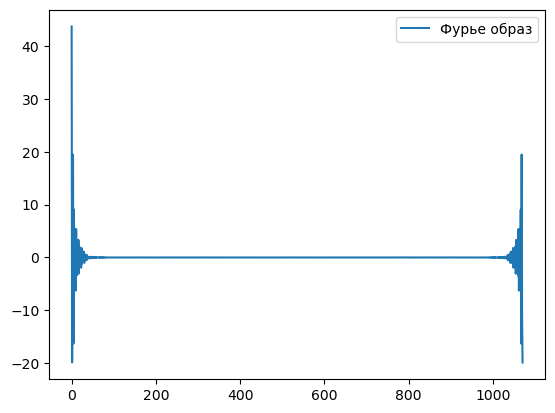

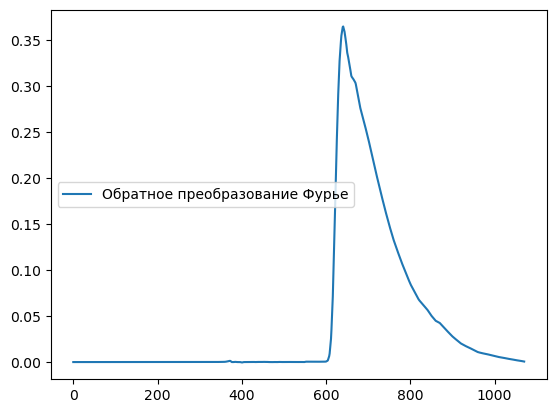

In [24]:
# res_fft_test = np.fft.fft(result)
# res_ifft_test = np.fft.ifft(res_fft_test)

# plt.figure()
# plt.plot(lambdas, res_fft_test, label = 'Фурье образ')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(lambdas, res_ifft_test, label = 'Обратное преобразование Фурье')
# plt.legend()
# plt.show()

In [20]:
# ccd = pd.read_csv("C:/Users/miron/Downloads/ccd_prosilica2.crv", sep = ' ')
# ccd

,X,Y
0,0.31,0.000
1,0.32,0.000
2,0.33,0.000
3,0.34,0.000
4,0.35,0.056
...,...,...
72,1.03,0.012
73,1.04,0.010
74,1.05,0.007
75,1.06,0.005


In [24]:
# a05 = pd.read_csv("C:/Users/miron/Downloads/a05.sp", sep = ' ')
# a05

,X,Y
0,310.0,0.608
1,320.0,0.621
2,330.0,0.636
3,340.0,0.631
4,350.0,0.630
...,...,...
72,1030.0,0.353
73,1040.0,0.346
74,1050.0,0.340
75,1060.0,0.333


In [56]:
# result = a05 * ccd
# result

,X,Y
0,96.1,0.000000
1,102.4,0.000000
2,108.9,0.000000
3,115.6,0.000000
4,122.5,0.035280
...,...,...
72,1060.9,0.004236
73,1081.6,0.003460
74,1102.5,0.002380
75,1123.6,0.001665
